38.4 dB noise convergence error(Middlestart:  0.005740929779993607 %
38.4 dB noise convergence error(Highstart:  0.07936240341594596 %
38.4 dB noise convergence error(Lowstart:  0.066649739539722 %
21.8 dB noise convergence error(Middlestart:  0.0493796394324409 %
21.8 dB noise convergence error(Highstart:  0.02784025572724856 %
21.8 dB noise convergence error(Lowstart:  0.06077211806263672 %
7.8 dB noise convergence error(Middlestart:  0.34788764837345304 %
7.8 dB noise convergence error(Highstart:  0.22417577243176853 %
7.8 dB noise convergence error(Lowstart:  0.09593220221574823 %
-3.0 dB noise convergence error(Middlestart:  0.4787276879474989 %
-3.0 dB noise convergence error(Highstart:  0.5940396419365486 %
-3.0 dB noise convergence error(Lowstart:  0.248609477116725 %
-13.1 dB noise convergence error(Middlestart:  3.7270799015285747 %
-13.1 dB noise convergence error(Highstart:  3.5270582647036113 %
-13.1 dB noise convergence error(Lowstart:  3.177124925412268 %


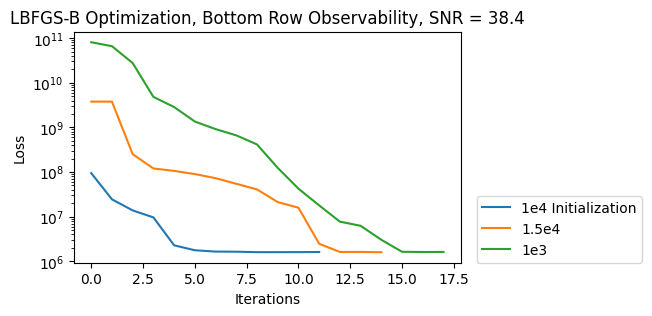

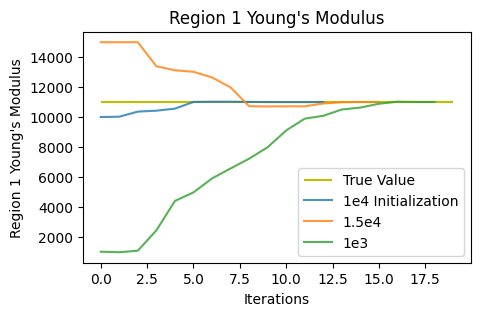

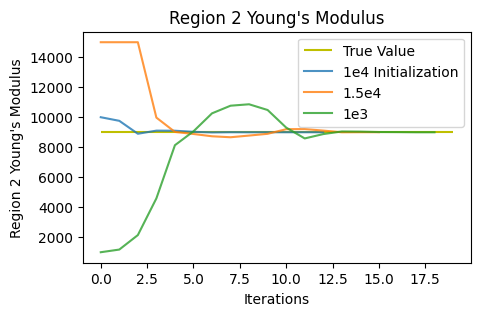

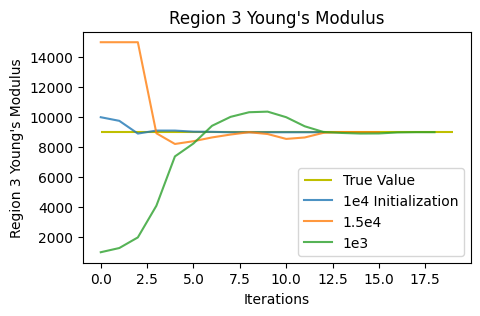

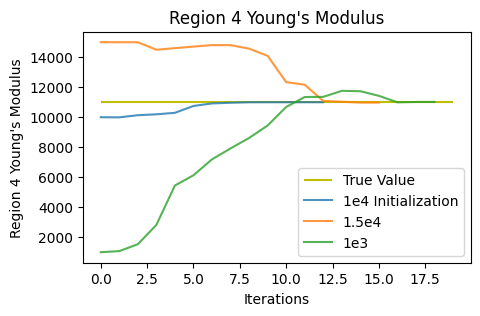

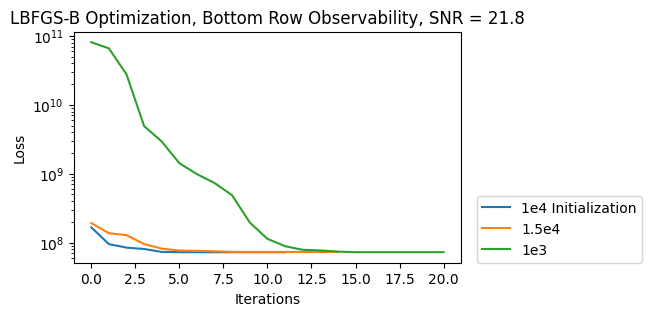

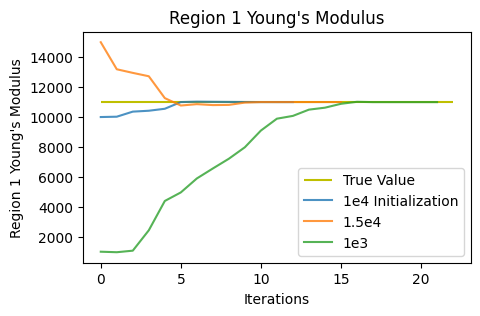

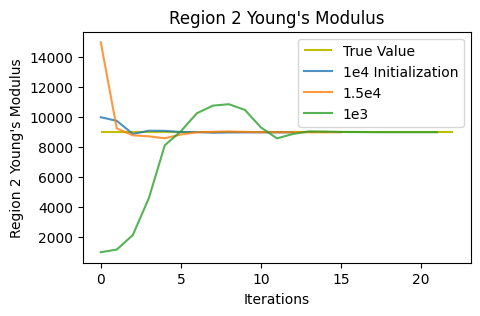

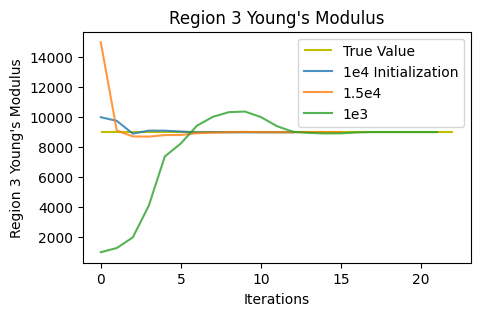

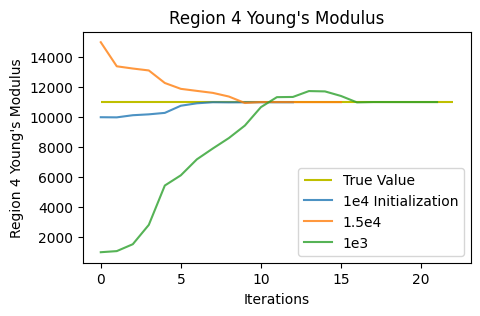

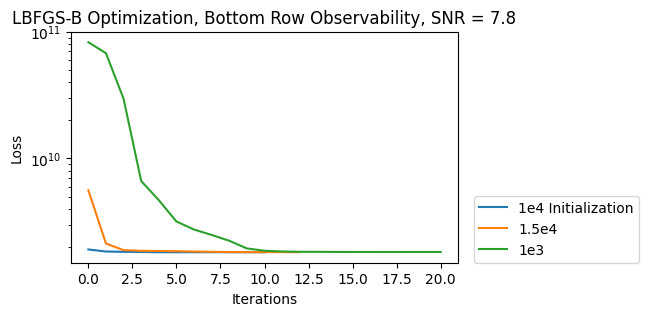

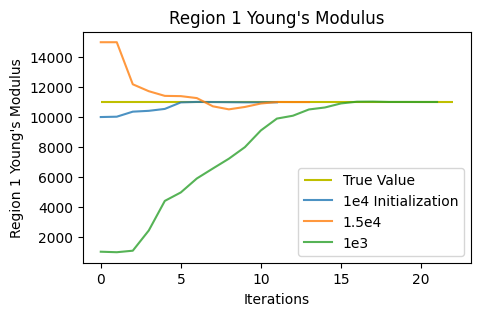

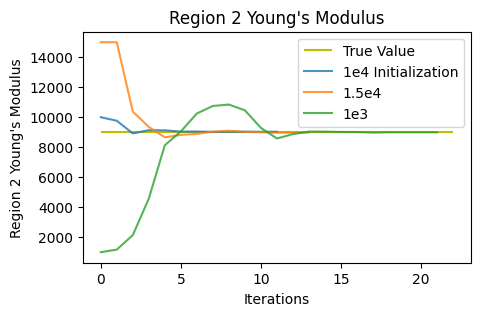

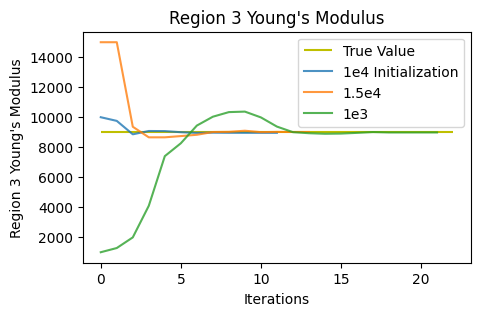

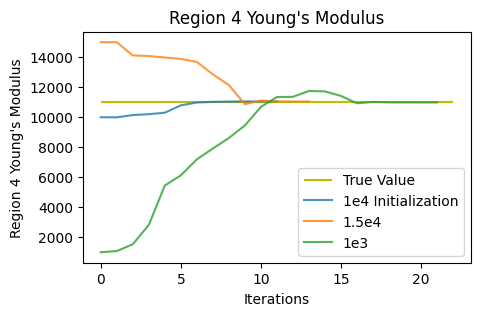

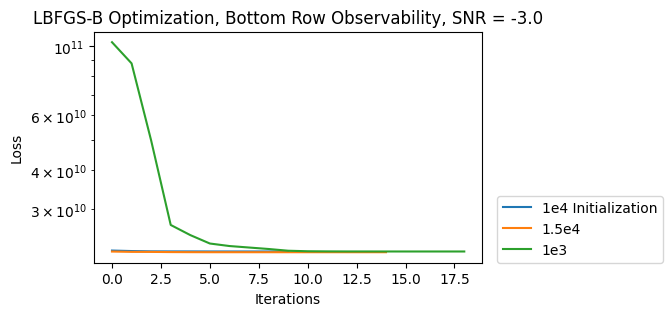

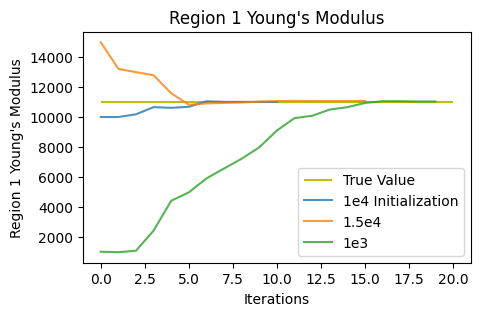

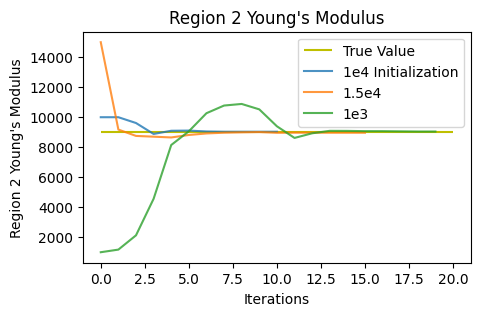

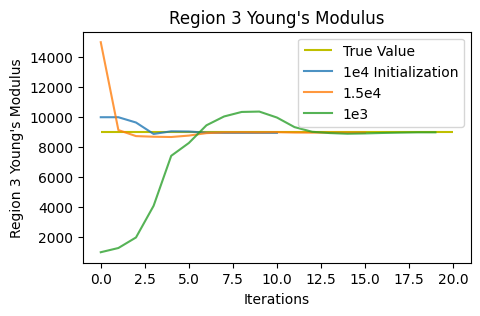

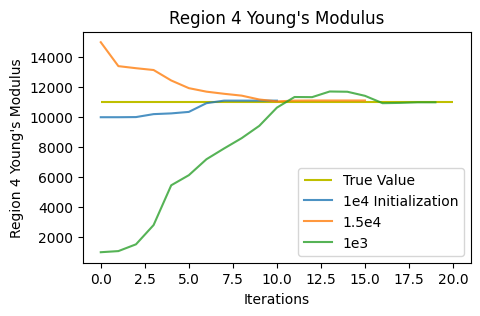

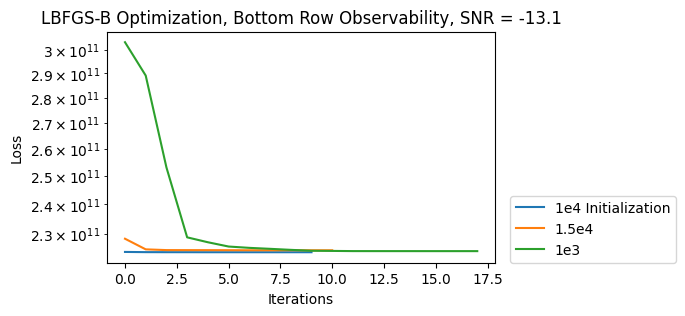

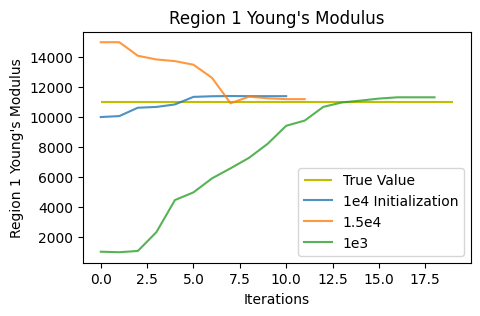

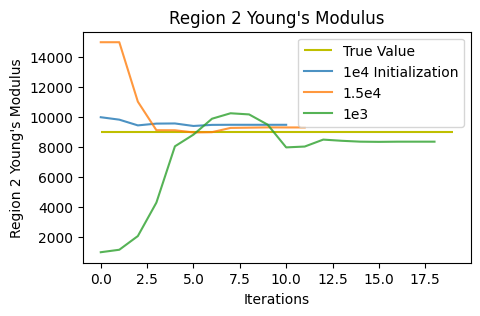

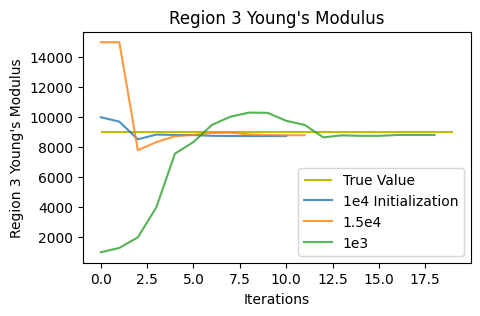

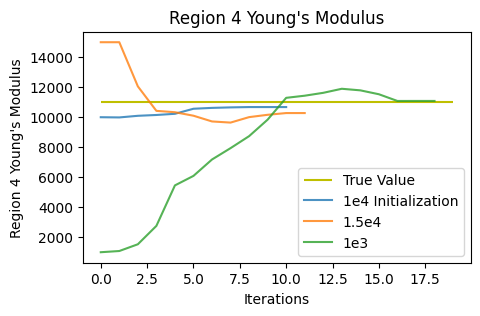

In [20]:
import matplotlib.pyplot as plt
import json
import numpy as np

snrs = [
    '384',
    '218',
    '78',
    '-30',
    '-131'
    ]

for snr in snrs:
    snr_num = float(snr) / 10

    filenames = [
        'result_db_' + snr + '_init_1e4.json',
        'result_db_' + snr + '_init_15e4.json',
        'result_db_' + snr + '_init_1e3.json',
    ]
    results = []
    for name in filenames:

        with open(name) as json_file:
            result = json.load(json_file)
            results.append(result)
    Es = [1.1e4, 0.9e4, 0.9e4, 1.1e4]
    keys = ["E1", "E2", "E3", "E4"]
    inits = ["Middle", "High", "Low"]
    
    for j, init in enumerate(inits):
        avg_err = 0
        result = results[j]

        for i, key in enumerate(keys):
            avg_err += np.abs(result[key][-1] - Es[i]) / Es[i]
        
        avg_err = avg_err / 4

        print(str(snr_num) + " dB noise convergence error" + "(" + init + "start: ", avg_err*100, '%')

for snr in snrs:

    snr_num = float(snr) / 10

    filenames = [
        'result_db_' + snr + '_init_1e4.json',
        'result_db_' + snr + '_init_15e4.json',
        'result_db_' + snr + '_init_1e3.json',
    ]
    results = []
    for name in filenames:

        with open(name) as json_file:
            result = json.load(json_file)
            results.append(result)




    keys = ["E1", "E2", "E3", "E4"]
    Es = [1.1e4, 0.9e4, 0.9e4, 1.1e4]
    scale = [1, 1, 1, 1, 1, 1]
    labels = ['1e4 Initialization',
            '1.5e4', 
            '1e3',
            '1e3',
            '2e4',
            '8 particles, $\epsilon_{xx}$']
    colors = []

    plt.figure(figsize=(5,3))
    plt.title("LBFGS-B Optimization, Bottom Row Observability, SNR = " + str(snr_num))
    plt.ylabel("Loss")
    plt.yscale('log')
    plt.xlabel("Iterations")
    for j, result in enumerate(results):
        plt.plot(np.array(result["losses"]) * scale[j], label=labels[j])
    plt.legend(loc=(1.04,0))
    plt.yscale('log')
    plt.show()

    regions = ['Region 1 Young\'s Modulus',
            'Region 2 Young\'s Modulus',
                'Region 3 Young\'s Modulus', 
                'Region 4 Young\'s Modulus']
    for i, key in enumerate(keys):
        max_its = max([len(result[key]) for key in keys])
        plt.figure(figsize=(5,3))
        plt.title(regions[i])
        plt.ylabel(regions[i])
        plt.xlabel("Iterations")
        plt.hlines(Es[i], 0, max_its, color='y', label='True Value')
        for j, result in enumerate(results):
            plt.plot(result[key], alpha=0.8, label=labels[j])
        plt.legend()
        plt.show()
